In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
from sklearn import preprocessing

In [2]:
data = pd.read_csv("birthweight_reduced.csv")
data.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                42 non-null     int64  
 1   headcirumference  42 non-null     int64  
 2   length            42 non-null     int64  
 3   Birthweight       42 non-null     float64
 4   Gestation         42 non-null     int64  
 5   smoker            42 non-null     int64  
 6   motherage         42 non-null     int64  
 7   mnocig            42 non-null     int64  
 8   mheight           42 non-null     int64  
 9   mppwt             42 non-null     int64  
 10  fage              42 non-null     int64  
 11  fedyrs            42 non-null     int64  
 12  fnocig            42 non-null     int64  
 13  fheight           42 non-null     int64  
 14  lowbwt            42 non-null     int64  
 15  mage35            42 non-null     int64  
 16  LowBirthWeight    42 non-null     object 
dtyp

In [4]:
X = data.iloc[:,1:-1]
X.head()

,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0
1,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0
2,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0
3,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1
4,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0


In [14]:
y = data.iloc[:,-1]
y.head()

0       Low
1       Low
2    Normal
3       Low
4       Low
Name: LowBirthWeight, dtype: object

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [6]:
from sklearn.linear_model import LogisticRegression 

In [7]:
clf = LogisticRegression(solver = 'liblinear')

In [16]:
clf.fit(X_train,y_train.values.ravel())

LogisticRegression(solver='liblinear')

In [17]:
clf.intercept_

array([-0.01978702])

In [18]:
coef = pd.Series( clf.coef_[0])
coef

0     0.019314
1     0.366095
2     0.551729
3     0.724373
4    -0.047180
5     0.099839
6     0.020788
7    -0.358074
8     0.234893
9     0.089405
10   -0.214357
11   -0.051986
12   -0.576315
13   -0.463375
14    0.000009
dtype: float64

In [19]:
feature_name = pd.Series( X.columns.values)

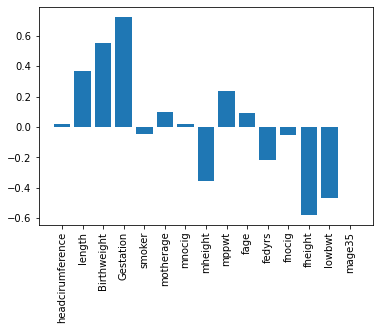

In [20]:
plt.bar(feature_name, coef)
plt.xticks(rotation = 'vertical')
plt.show()

In [22]:
y_predict = clf.predict(X_test)
y_predict

array(['Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal'], dtype=object)

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print("Accuracy is ", accuracy_score(y_test, y_predict)* 100, "%")

Accuracy is  92.3076923076923 %


In [25]:
#Do chinh xac cua model cao

In [26]:
print("Training score(r^2): ", clf.score(X_train, y_train))

Training score(r^2):  1.0


In [27]:
print("Testting score(r^2): ", clf.score(X_test, y_test))

Testting score(r^2):  0.9230769230769231


##### Điểm r^2 của training và testting không chênh lệch qá nhiều, model không bị over hoặc underfitting
##### Dữ liệu cần được bổ sung thêm vì chỉ có 42 mẫu, khá ít

In [28]:
X_now = [[12, 18, 4.5, 35, 1, 41, 7, 65, 125, 37, 14, 25, 68, 1, 1]]
y_now = clf.predict(X_now)
y_now

array(['Normal'], dtype=object)